In [ ]:
1. Revision of Logistic Regression
2. EDA on a given Dataset
3. Build a Machine Learning model on the same data set to identify good or bad customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


# Data
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).
This dataset provides the customer information. It includes 41188 records and 21 fields.

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

y - has the client subscribed a term deposit? (binary: '1','0')

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [15]:
data.shape

(41188, 21)

In [16]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

#### Data Exploration

In [18]:
#analyse columns
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

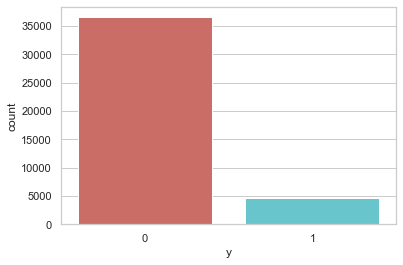

In [20]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

Observations : It's an imbalanced data set. Hence accuracy will not be a good model evaluator.

In [21]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [22]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [23]:
data['education'] = np.where(data['education'] == 'basic.9y', "Basic", data['education'])

data['education'] = np.where(data['education'] == 'basic.6y', "Basic", data['education'])

data['education'] = np.where(data['education'] == 'basic.4y', "Basic", data['education'])

In [24]:
data['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [26]:
#Analysis

data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [27]:
#1 Observation - The mean age of people subscribing to term deposit is slightly higher

#2 duration - this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

#3 p-days - P-days is undertanbly lower. Which means lower the pdays better the chances that the customer will subscribe t
#to the term deposit

In [28]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [30]:
# retried people and student are highly likely to subscribe to term deposit

In [29]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [31]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [32]:
#massive difference in subscription rate for customers with basic education vs illetrates

#### Job as a chasretristic

In [35]:
pd.crosstab(data['job'],data['y'])

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


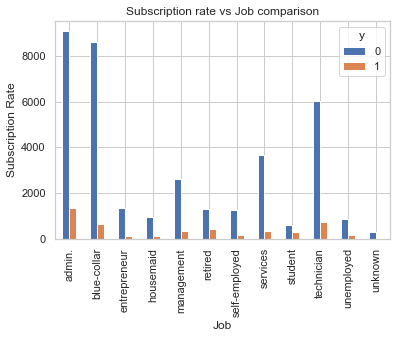

In [34]:
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title('Subscription rate vs Job comparison')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.show()

#### Marital Status as a chasretristic

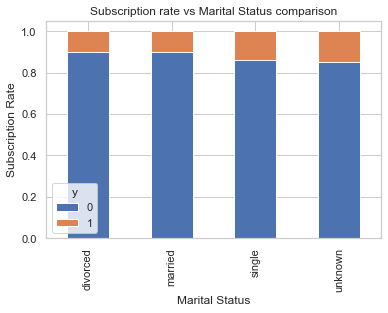

In [43]:
#Stacked bar chart
table = pd.crosstab(data['marital'],data['y'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Subscription rate vs Marital Status comparison')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.show()

In [37]:
table

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [40]:
4136 + 476

4612

In [42]:
(4136/4612),(476/4612)

(0.8967909800520382, 0.10320901994796183)

In [39]:
#div = division
table.div(table.sum(1),axis=0)

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


#### Education

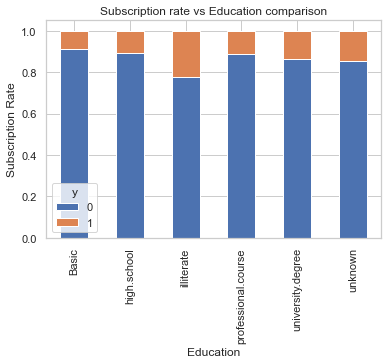

In [44]:
table = pd.crosstab(data['education'],data['y'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Subscription rate vs Education comparison')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.show()

#### Pre-processing

In [45]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [46]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [50]:
categorical_columns_list = ['job', 'marital', 'education', 'default', 'housing',
                            'loan','contact', 'month', 'day_of_week', 'poutcome']

In [52]:
for column in categorical_columns_list:
    
    cat_list = pd.get_dummies(data[column],prefix=column) # creating dummy variables
    
    data1 = data.join(cat_list) # concatenating the dummy variables with the original dataframe
    
    data = data1

In [53]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,0,0,0,0,1,0,0,0,1,0
41184,31,housemaid,married,Basic,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,0,0,0,0,0,0,1,0,1,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,1,0,0,0,0,1,0,0,1,0


In [56]:
#we need to deiscard the columns that are already converted into dummy
data_vars = data.columns.tolist()

# keep = []

# for column in data_vars:
    
#     if column not in categorical_columns_list:
        
#         keep.append(column)
        
        
keep = [column for column in data_vars if column not in categorical_columns_list]

In [57]:
len(keep)

62

In [58]:
data_final = data[keep]
data_final  # our processed dataframe

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


#### Model Building

In [59]:
X = data_final.loc[:,data_final.columns != 'y']
Y = data_final.loc[:,data_final.columns == 'y']

In [60]:
X.shape

(41188, 61)

In [61]:
Y.shape

(41188, 1)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 21)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#logreg.coef_

/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sreemantakesh/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 2.67092209e-03,  4.73254862e-03, -7.01786562e-02,
        -1.62870325e-03,  1.73585445e-02, -2.66567444e-01,
         2.07547990e-01,  3.31948301e-02, -2.85035030e-01,
        -3.81331278e-03,  1.42286570e-02, -2.63738265e-02,
        -2.62819884e-03, -7.98374872e-05,  1.07487961e-03,
         9.40353014e-03, -3.55073827e-04, -6.19064269e-03,
         9.07906047e-03,  2.93243613e-03,  1.78968929e-03,
        -1.65871418e-04, -4.24232884e-03, -1.50907869e-02,
         2.20730581e-02, -2.51404906e-05, -2.14240720e-02,
        -4.67381767e-03,  2.33823179e-04,  2.83660416e-03,
         2.52924519e-02,  4.49812273e-04,  3.23877860e-02,
        -2.96643210e-02, -8.66316652e-06,  2.78701664e-05,
        -4.95247103e-04,  3.18217881e-03,  3.21697906e-03,
        -4.95247103e-04, -6.93008230e-06,  4.38393581e-02,
        -4.11245563e-02,  1.22054767e-02,  5.51358931e-03,
         3.01932987e-03, -4.03946924e-03,  6.00344854e-03,
         1.71978513e-02, -5.04337757e-02, -5.37570437e-0

In [66]:
y_pred = logreg.predict(X_test)

In [67]:
from sklearn import metrics

In [68]:
metrics.accuracy_score(y_test,y_pred)

0.9096058913975884

In [69]:
metrics.recall_score(y_test,y_pred)

0.4089935760171306

In [70]:
metrics.precision_score(y_test,y_pred)

0.6647331786542924

In [72]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10956
           1       0.66      0.41      0.51      1401

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#### ROC Curve

In [75]:
#sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)


Text(0.5, 1.0, 'ROC Curve')

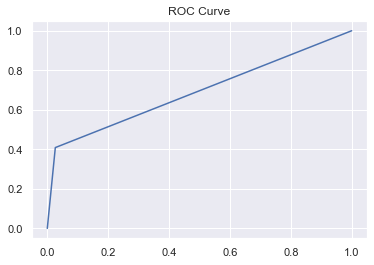

In [76]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)
plt.title('ROC Curve')